In [7]:
%load_ext autoreload
%autoreload 2
from pyMSOO.MFEA.model import MaTGA
from pyMSOO.utils.Crossover import *
from pyMSOO.utils.Mutation import *
from pyMSOO.utils.Selection import *
from pyMSOO.utils.DimensionAwareStrategy import *
from pyMSOO.MFEA.benchmark.continous import *
from pyMSOO.utils.MultiRun.RunMultiTime import * 

random percent: 0
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Benchmark

In [12]:
tasks, IndClass = GNBG_benchmark.get_multitask_benchmark(2)

-912.8573739743372
30
-656.7889979935655
30
-884.7360096017693
30
-604.9748272222274
30
-118.07535757360006
30
-1002.4790787013411
30
-216.7276963542314
30
-194.03819354550546
30
-234.28042789139022
30


##### CEC17

In [14]:
tasks, IndClass = CEC17_benchmark.get_2tasks_benchmark(5)
# tasks, IndClass = WCCI22_benchmark.get_complex_benchmark(10)
# tasks, IndClass = CEC17_benchmark.get_10tasks_benchmark()
# tasks, IndClass = WCCI22_benchmark.get_50tasks_benchmark(10)
# tasks, IndClass = GNBG_benchmark.get_multitask_benchmark(3)
baseModel = MaTGA.model(seed = 25)
baseModel.compile(
    IndClass= IndClass,
    tasks= tasks,
    # crossover = KL_SBXCrossover(nc= 2, k= 100, conf_thres= 1),
    crossover= SBX_Crossover(nc = 2),
    mutation= PolynomialMutation(nm = 5),
    selection= ElitismSelection(),
    dimension_strategy=DaS_strategy(eta=3)
)
solve = baseModel.fit(
    nb_generations = 1000, rmp = 0.1, nb_inds_each_task= 100, 
    bound_pop= [0, 1], evaluate_initial_skillFactor= True
)

random percent: 0
Seed: 25 -- Time: 00m 15.18s  100 % [====================>]  Cost: 9.02133E-04  8.65577E+01  ,  
END!


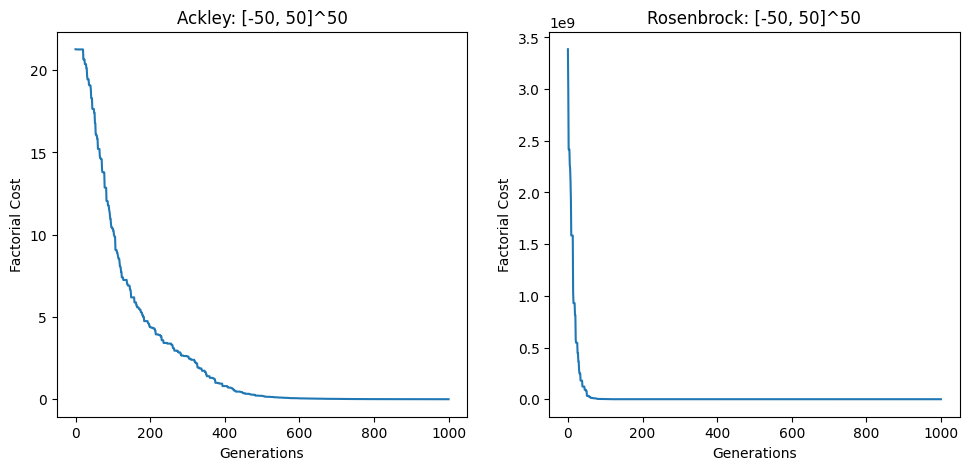

In [15]:
baseModel.render_history()

### Multitime model

In [4]:
baseModel = MultiTimeModel(model= MaTGA)
baseModel.compile(
    IndClass= IndClass,
    tasks= tasks,
    crossover= SBX_Crossover(nc = 2),
    mutation= PolynomialMutation(nm = 5),
    selection= ElitismSelection(),
    dimension_strategy=DaS_strategy(eta= 3)
)
baseModel.fit(
    nb_generations = 1000, rmp = 0.1, nb_inds_each_task= 100, 
    bound_pop= [0, 1], evaluate_initial_skillFactor= True
)

In [9]:
baseModel.run(
    nb_run= 30,
    save_path= './RESULTS/MaTGA_cec17.mso'
)

Seed: 0 -- Time: 02m 15.02s  100 % [====================>]  Cost: 4.23E-05  8.45E-10  2.02E-11  3.00E-11  4.16E-03  8.40E-06  7.77E-04  1.63E-03  1.13E-05  3.11E+01  ,  
END!
Seed: 1 -- Time: 02m 29.28s  100 % [====================>]  Cost: 5.87E-06  1.39E-09  1.93E-12  2.89E-11  4.07E-04  1.03E-05  3.64E-04  1.47E-03  1.19E-05  3.95E+01  ,  
END!
Seed: 2 -- Time: 02m 17.29s  100 % [====================>]  Cost: 8.48E-06  1.56E-10  3.18E-11  1.93E-12  4.94E-04  3.65E-06  1.03E-03  1.53E-03  8.82E-06  4.08E+01  ,  
END!
Seed: 3 -- Time: 02m 21.81s  100 % [====================>]  Cost: 5.02E-06  8.77E-10  2.49E-12  1.67E-09  3.14E-04  8.87E-06  4.62E-04  1.76E-03  1.66E-05  4.66E+01  ,  
END!
Seed: 4 -- Time: 02m 6.43s  100 % [====================>]  Cost: 4.42E-06  1.52E-09  6.30E-12  8.28E-11  3.95E-04  1.05E-05  5.77E-04  8.31E-04  9.61E-06  4.13E+01  ,  
END!
Seed: 5 -- Time: 02m 17.94s  100 % [====================>]  Cost: 9.20E-07  3.17E-09  3.10E-12  5.29E-11  5.52E-05  1.72E-05  

In [11]:
from pyMSOO.utils.LoadSaveModel.LoadModel import loadModel

baseModel = loadModel('./RESULTS/MaTGA_cec17.mso', ls_tasks= tasks, set_attribute= True)

Error when create object DictType. Using Temp class instead
Error when create object UnicodeType. Using Temp class instead
Error when create object Float. Using Temp class instead
Error when create object Tuple. Using Temp class instead
Error when create object UnionType. Using Temp class instead
Error while create instance model for <class 'pyMSOO.utils.EA.Population'>. Using Temp class instead
Error while create instance model for <class 'pyMSOO.utils.EA.SubPopulation'>. Using Temp class instead


In [ ]:
baseModel.render_history()
print()